In [277]:
import pandas as pd
from sqlalchemy import create_engine
import json

# Wine Reviews Data

For this ETL project we use data from Kaggle.com. The data-set that we choose is related to wine prodcutions accross the world. It contains relevant information about the producer, location, reviews, etc.


We found 3 data files with the wine information within the below link. The information is stored in 3 files, 2 of them in CSV format and one in JSON format.

https://www.kaggle.com/zynicide/wine-reviews

# Assign data files into variables

In [278]:
wine_mag150_file = "winemag-data_first150k.csv"
wine_mag130_file = "winemag-data-130k-v2.csv"
wine_json_file = "winemag-data-130k-v2.json"

# Storing CSV file into pandas dataframe

In [279]:
wine_150_df = pd.read_csv(wine_mag150_file)
wine_150_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# Storing JSON file into pandas dataframe

In [280]:
wine_130_df = pd.read_json("winemag-data-130k-v2.json")
wine_130_df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Parsing the dataframe to identify cleansing oportunities

In [281]:
countries = wine_130_df.groupby(['country']).count()
countries.head()

,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
country,,,,,,,,,,,,
Argentina,3800,2902,3800,3756,3800,3747,0,3797,3797,3800,3800,3800
Armenia,2,2,2,2,2,0,0,2,2,2,2,2
Australia,2329,1640,2329,2294,2329,2327,0,2037,2037,2329,2329,2329
Austria,3345,2825,3345,2799,3345,0,0,3337,3337,3345,3345,3345
Bosnia and Herzegovina,2,1,2,2,2,0,0,2,1,2,2,2


# Cleaning the data - removing unnecesary columns

We identified that columns unnamned: 0, region_1, region_2, designation and taster_twitter_handle contained several null values and not relevant data, hence we decided to remove these columns from the dataframe. Specifically region_1 and region_2 had non-null values only for USA.

After drop the columns we also decided to remove rows with null values.

In [282]:
wine_json_df = wine_130_df.drop(['region_1', 'region_2', 'designation','taster_twitter_handle'], axis=1).dropna()
wine_csv_df = wine_150_df.drop(['Unnamed: 0', 'region_1', 'region_2', 'designation'], axis=1).dropna()

# Checking the remaining number of rows and columns for each dataframe

In [283]:
print(wine_json_df['points'].count())
print(wine_csv_df['points'].count())

96420
137230


In [284]:
print(wine_csv_df.columns)
print(wine_json_df.columns)

Index(['country', 'description', 'points', 'price', 'province', 'variety',
       'winery'],
      dtype='object')
Index(['country', 'description', 'points', 'price', 'province', 'taster_name',
       'title', 'variety', 'winery'],
      dtype='object')


# Creating a new index

After the cleansing we identified that some values from the index were missing, therefore we decided to create a new index

In [285]:
final_wine_csv = wine_csv_df.reset_index(drop=True)
final_wine_json = wine_json_df.reset_index(drop=True)

In [286]:
final_wine_csv = final_wine_csv.rename(columns = {'country' : 'pais', 'description': 'descripcion', 'price': 'precio',
                                  'points': 'puntaje', 'province' : 'provincia', 'variety': 'variedad', 
                                 'winery': 'casa'})

final_wine_json = final_wine_json.rename(columns = {'country' : 'pais', 'description': 'descripcion', 'price': 'precio',
                                  'points': 'puntaje', 'province' : 'provincia', 'variety': 'variedad', 
                                 'winery': 'casa', 'taster_name': 'catador', 'title':'nombre'})


# Adding quality/price ratio column

Using the columns price and points (asigns a numerical value to rate the quality of the wine based on wine enthusiast's reviews) we defined a quality/price ratio to indentify the best wines

In [287]:
final_wine_csv['calidad_precio'] = final_wine_csv['puntaje'] / final_wine_csv['precio']
final_wine_json['calidad_precio'] = final_wine_json['puntaje'] / final_wine_json['precio']

In [288]:
final_wine_json['calidad_precio'].isnull().values.any()
final_wine_csv['calidad_precio'].isnull().values.any()

False

# Checking the structure of the finals dataframes

In [297]:
print(final_wine_json.columns)
print(final_wine_csv.columns)

Index(['pais', 'descripcion', 'puntaje', 'precio', 'provincia', 'catador',
       'nombre', 'variedad', 'casa', 'calidad_precio'],
      dtype='object')
Index(['pais', 'descripcion', 'puntaje', 'precio', 'provincia', 'variedad',
       'casa', 'calidad_precio'],
      dtype='object')


# Connectiing to data base

database configurations are stored in a JSON file, we load the JSON and create the conexion string to connect to the DB

In [290]:
#Import db connection parameters from json file
with open('databaseconfig.json') as json_data_file:
         data = json.load(json_data_file)

In [291]:
#Open DB connection
conexion_string = f'postgresql://{data["mysql"]["user"]}:{data["mysql"]["passwd"]}@{data["mysql"]["host"]}/{data["mysql"]["db"]}'

engine = create_engine(conexion_string)

# Checking for the tables

In [292]:
engine.table_names()

['wine_csv', 'wine_json']

# Use pandas to load csv converted DataFrame into database

In [294]:
final_wine_json.to_sql(name='wine_json', con=engine, if_exists='append', index=False)

In [295]:
final_wine_csv.to_sql(name='wine_csv', con=engine, if_exists='append', index=False)

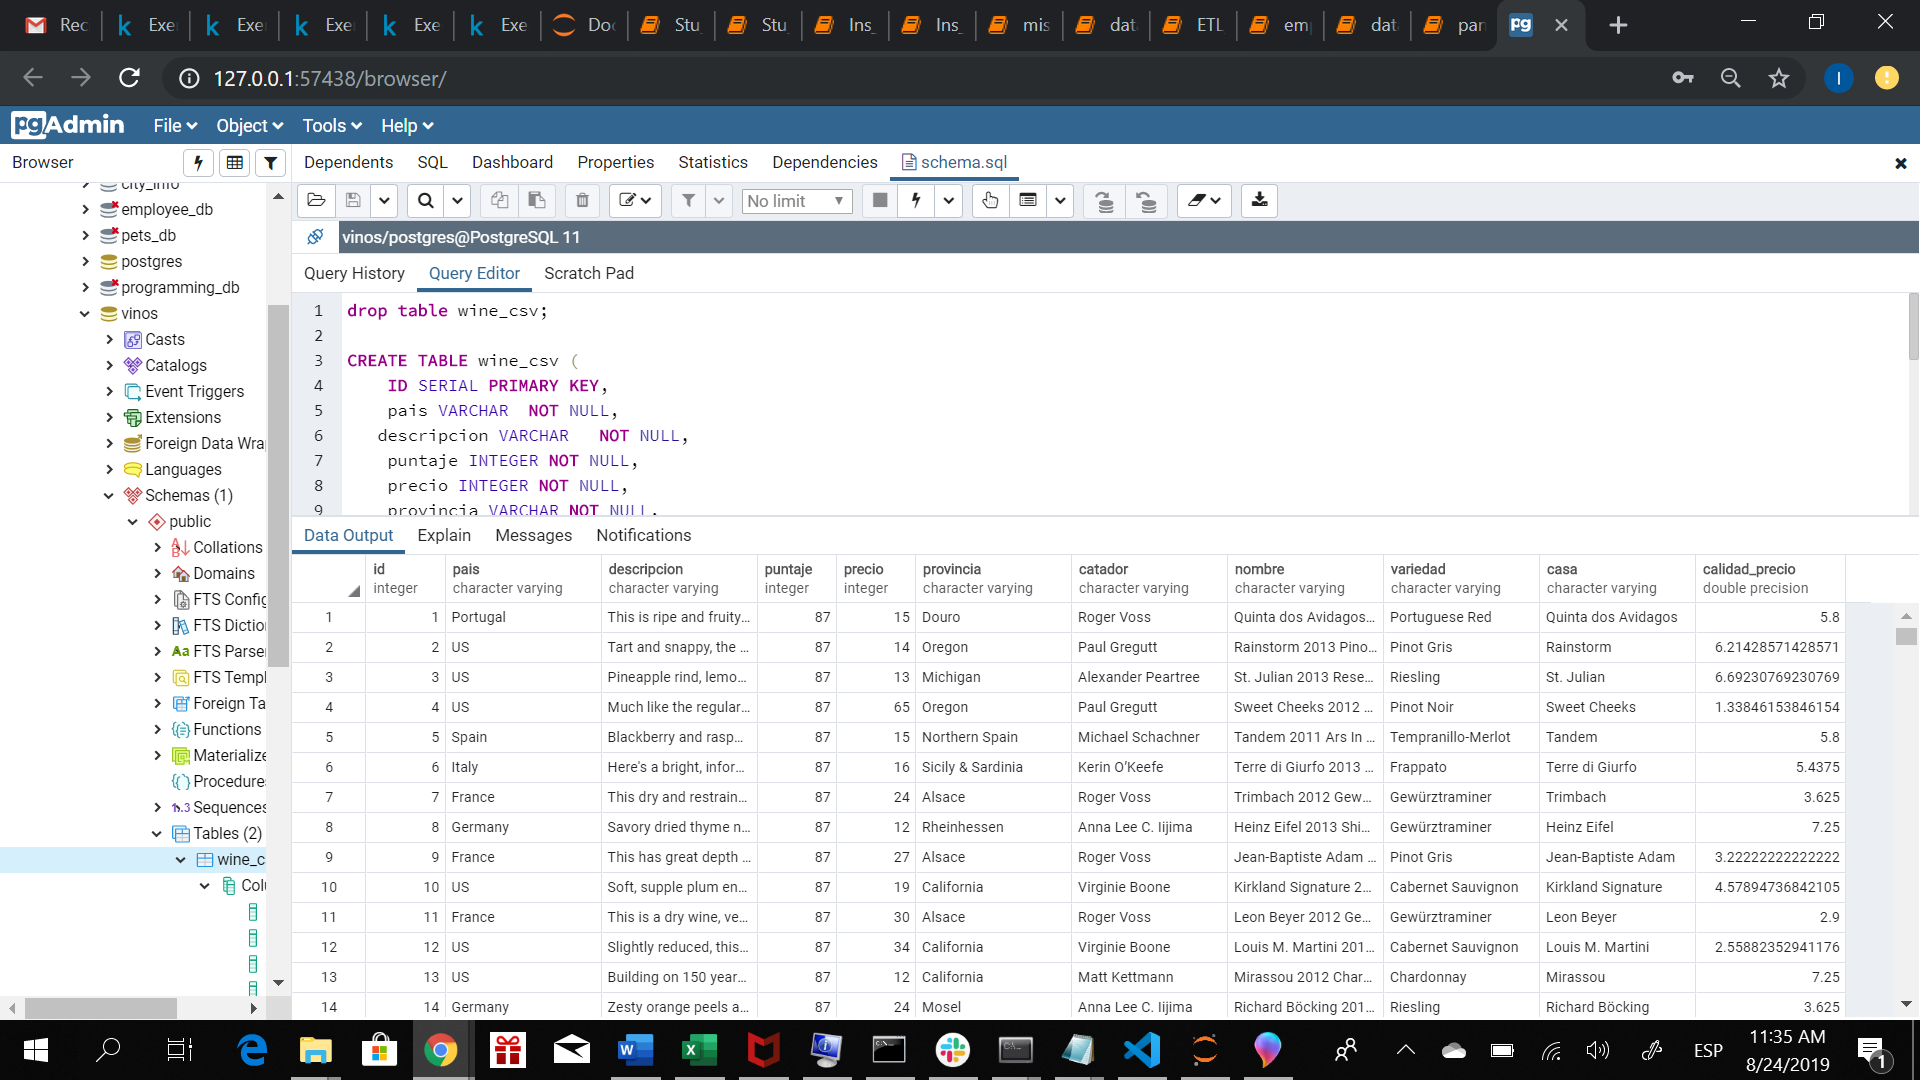

# Cheking for the best wines based on quality/price ratio

In [298]:
final_wine_json.sort_values(by=['calidad_precio'], ascending=False).head()

,pais,descripcion,puntaje,precio,provincia,catador,nombre,variedad,casa,calidad_precio
93582,Romania,Notes of sun-dried hay and green flower highli...,86,4.0,Viile Timisului,Anna Lee C. Iijima,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Pinot Grigio,Cramele Recas,21.50
15194,US,"Fruity, soft and rather sweet, this wine smell...",85,4.0,California,Jim Gordon,Dancing Coyote 2015 White (Clarksburg),White Blend,Dancing Coyote,21.25
1516,Spain,Berry and cherry aromas are surprisingly sturd...,85,4.0,Central Spain,Michael Schachner,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,Felix Solis,21.25
83583,Spain,"Nice on the nose, this has a leafy note and a ...",84,4.0,Levante,Michael Schachner,Terrenal 2010 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,21.00
45448,Spain,This opens with standard cherry and berry arom...,84,4.0,Levante,Michael Schachner,Terrenal 2010 Cabernet Sauvignon (Yecla),Cabernet Sauvignon,Terrenal,21.00


In [299]:
final_wine_csv.sort_values(by=['calidad_precio'], ascending=False).head()

,pais,descripcion,puntaje,precio,provincia,variedad,casa,calidad_precio
66594,Romania,Notes of sun-dried hay and green flower highli...,86,4.0,Viile Timisului,Pinot Grigio,Cramele Recas,21.5
114564,US,"There's a lot going on in this Merlot, which i...",86,4.0,California,Merlot,Bandit,21.5
89405,Portugal,"This is a ripe-fruited wine, rich with dried f...",86,4.0,Alentejano,Portuguese Red,Herdade dos Machados,21.5
44209,US,"There's a lot going on in this Merlot, which i...",86,4.0,California,Merlot,Bandit,21.5
23430,US,"There's a lot going on in this Merlot, which i...",86,4.0,California,Merlot,Bandit,21.5
